<a href="https://colab.research.google.com/github/aslihanozenc/house_prices_ml/blob/main/aslihanozenc_globalaihub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Housing Price Predictions with Melbourne Housing Dataset 🏡 💰

---

Aslıhan Özenç,
aslhanozenc@gmail.com

Global AI Hub Akbank ML Bootcamp, 2023

The dataset contains several
attributes of the houses in Melbourne along with their prices.
The variables in the data set:

● Suburb

● Address

● Rooms: Number of rooms

● Price: Price in Australian dollars, target variable

● Method:
      
      S - property sold;
      SP - property sold prior;
      PI - property passed in;
      PN - sold prior not disclosed;
      SN - sold not disclosed;
      NB - no bid;
      VB - vendor bid;
      W - withdrawn prior to auction;
      SA - sold after auction;
      SS - sold after auction price not disclosed.
      N/A - price or highest bid not available.

● Type:

        br - bedroom(s);
        h - house,cottage,villa, semi,terrace;
        u - unit, duplex;
        t - townhouse;
        dev site -development site;
        o res - other residential.

● SellerG: Real Estate Agent

● Date: Date sold

● Distance: Distance from CBD in Kilometres

● Regionname: General Region (West, North West, North, North east ...etc)

● Propertycount: Number of properties that exist in the suburb.

● Bedroom2 : Scraped # of Bedrooms (from different source)

● Bathroom: Number of Bathrooms

● Car: Number of carspots

● Landsize: Land Size in Metres

● BuildingArea: Building Size in Metres

● YearBuilt: Year the house was built

● CouncilArea: Governing council for the area

● Lattitude

● Longtitude


# -Importing Required Libraries

---



In [ ]:
!pip install catboost
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format',  '{:.2f}'.format)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.4 MB/s eta 0:00:00


# -Gathering and Observing Data

---

Loading the dataset to the project with the help of read_csv() and observing the first 5 .columns

● Finding the shape, number of columns and size of the dataset

● Showing the information of the dataset, which contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

In [ ]:
df = pd.read_csv('/content/Melbourne_housing_FULL.csv')
df_copy = df.copy()
df_copy.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.50,3067.00,2.00,1.00,1.00,126.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,2.00,1.00,1.00,202.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,2.00,1.00,0.00,156.00,79.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.50,3067.00,3.00,2.00,1.00,0.00,NaN,NaN,Yarra City Council,-37.81,145.01,Northern Metropolitan,4019.00
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,0.00,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00


In [ ]:
df_copy

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.50,3067.00,2.00,1.00,1.00,126.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,2.00,1.00,1.00,202.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,2.00,1.00,0.00,156.00,79.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.50,3067.00,3.00,2.00,1.00,0.00,NaN,NaN,Yarra City Council,-37.81,145.01,Northern Metropolitan,4019.00
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,0.00,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.00,PI,Jas,24/02/2018,6.30,3013.00,4.00,1.00,3.00,593.00,NaN,NaN,Maribyrnong City Council,-37.81,144.88,Western Metropolitan,6543.00
34853,Yarraville,29A Murray St,2,h,888000.00,SP,Sweeney,24/02/2018,6.30,3013.00,2.00,2.00,1.00,98.00,104.00,2018.00,Maribyrnong City Council,-37.82,144.89,Western Metropolitan,6543.00
34854,Yarraville,147A Severn St,2,t,705000.00,S,Jas,24/02/2018,6.30,3013.00,2.00,1.00,2.00,220.00,120.00,2000.00,Maribyrnong City Council,-37.82,144.88,Western Metropolitan,6543.00
34855,Yarraville,12/37 Stephen St,3,h,1140000.00,SP,hockingstuart,24/02/2018,6.30,3013.00,NaN,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.00


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [ ]:
print(f'Shape     : {df_copy.shape}\n'
      f'Size      : {df_copy.size}\n'
      f'Dimension : {df_copy.ndim}')

Shape     : (34857, 21)
Size      : 731997
Dimension : 2


In [ ]:
df_copy.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

Here, we can see that in out dataset, we have a large amount of null values in 'Price', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude' columns. So, we should fill the NaN values in these columns with an appropriate method.

On the other hand, 'Distance', 'Postcode', 'CouncilArea', 'RegionName', 'Propertycount' columns have only a few missing values. Since we have a big dataset, dropping these missing values would not affect the performance of our model so I will drop them.

I also realized that the columns 'Rooms' and 'Bedroom2' have the same datas, so I will drop one of these columns


In [ ]:
df_copy = df_copy.dropna(subset=['Distance', 'Postcode', 'CouncilArea', 'Regionname', 'Propertycount'])

In [ ]:
df_copy.drop('Bedroom2', axis=1, inplace=True)

<ipython-input-8-c5219e4b7784>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy.drop('Bedroom2', axis=1, inplace=True)


Now, let's see if we have any duplicate values. If yes, let's delete the duplications.

In [ ]:
df_copy.duplicated().sum()

1

In [ ]:
df_copy.loc[df_copy.duplicated(keep=False), :]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15857,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.40,3131.00,3.00,2.00,405.00,226.00,2000.00,Manningham City Council,-37.83,145.17,Eastern Metropolitan,4973.00
15858,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.40,3131.00,3.00,2.00,405.00,226.00,2000.00,Manningham City Council,-37.83,145.17,Eastern Metropolitan,4973.00


In [ ]:
df_copy.drop_duplicates(inplace=True)

<ipython-input-11-c4d6a34b292a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy.drop_duplicates(inplace=True)


In [ ]:
df_copy.duplicated().sum()

0

#-Calculating the descriptive statistics values of our dataset.

We can use these values for:

-Creating summary statistics and visualizations such as
histograms, box plots, and scatter plots, which provide insights into the distribution of our data.

-Outlier Detection: Mean and standard deviation can help us identify outliers. Observations that are significantly above or below the mean by a certain number of standard deviations can be considered outliers.

-Using mean or median values to fill in missing or NaN values in our dataset.

In [ ]:
descriptive_stats = df_copy.describe()
print(descriptive_stats)

         Rooms       Price  Distance  Postcode  Bathroom      Car  Landsize  BuildingArea  YearBuilt  Lattitude  Longtitude  Propertycount
count 34853.00    27244.00  34853.00  34853.00  26630.00 26128.00  23046.00      13741.00   15550.00   26880.00    26880.00       34853.00
mean      3.03  1050210.03     11.19   3116.07      1.62     1.73    593.61        160.25    1965.29     -37.81      145.00        7572.96
std       0.97   641492.29      6.79    109.03      0.72     1.01   3398.92        401.28      37.33       0.09        0.12        4428.13
min       1.00    85000.00      0.00   3000.00      0.00     0.00      0.00          0.00    1196.00     -38.19      144.42          83.00
25%       2.00   635000.00      6.40   3051.00      1.00     1.00    224.00        102.00    1940.00     -37.86      144.93        4385.00
50%       3.00   870000.00     10.30   3103.00      2.00     2.00    521.00        136.00    1970.00     -37.81      145.01        6763.00
75%       4.00  1295000.00 

-Seperating the data into 2 subsets: categorical and numerical.

In [ ]:
cat_cols = ['Suburb', 'Address', 'Type','SellerG','Method','Date','CouncilArea','Regionname']
num_cols = ['Rooms','Price','Distance','Postcode','Bathroom', 'Car', 'Landsize','BuildingArea','YearBuilt','Lattitude','Longtitude','Propertycount']

-Filling the NaN values with the modes of the related columns.

In [ ]:
modes = df_copy[num_cols].mode()

for column in num_cols:
    df_copy[column].fillna(modes[column].iloc[0], inplace=True)



<ipython-input-15-dcddd8af3b84>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy[column].fillna(modes[column].iloc[0], inplace=True)


In [ ]:
df_copy.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

# -Outlier Detection Using Z-score Method - Encoding

---



In [ ]:
from scipy.stats import zscore

z_score_threshold = 3

z_scores = df_copy[num_cols].apply(zscore)

outlier_mask = (z_scores.abs() > z_score_threshold).any(axis=1)

winsorized_df = df_copy  # Create a copy of the original DataFrame

lower_threshold = -z_score_threshold
upper_threshold = z_score_threshold

for column in num_cols:
    column_mean = df_copy[column].mean()
    column_std = df_copy[column].std()

    lower_bound = column_mean - (z_score_threshold * column_std)
    upper_bound = column_mean + (z_score_threshold * column_std)

    df_copy[column] = df_copy[column].clip(lower=lower_bound, upper=upper_bound)



<ipython-input-19-2a07e32302e5>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy[column] = df_copy[column].clip(lower=lower_bound, upper=upper_bound)


Z-Score method can only be used with the numerical values. In order to determine the z-scores of our categorical data, we should apply encoding to these columns.

-I will try to determine the relationship between my categorical columns' attributes and 'Price' column in order to apply label encoding to the necessary columns. I will determine this relationship by drawing boxplots for 'Type', 'Method', 'RegionName', 'CouncilArea', 'Suburb', 'SellerG', 'Address', 'Date'. Then I will apply label encoding to these columns by groupby method according to their Price values.


 Comment on the possible boxplot outputs:

---


 - The box plot provides insights into how housing prices vary across different parameters
 - Each box represents an attribute in the related column, and the vertical axis ('Price') shows the price distribution.
 - The central line inside each box represents the median price for that attribute.
 - The boxes show the interquartile range (IQR), with the lower and upper quartiles marked by the box's edges.
 - Whiskers extend from the boxes to indicate the range of prices within 1.5 times the IQR.
 - Individual data points beyond the whiskers are shown as outliers.
 - Attributes with higher median prices and narrower IQRs may be considered more desirable.


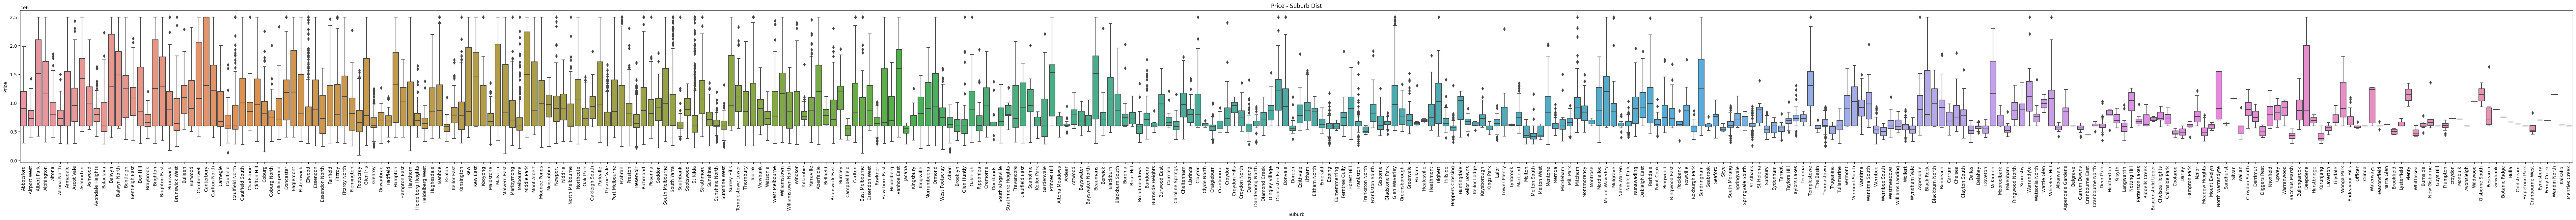

In [ ]:
plt.figure(figsize=(100, 6))
sns.boxplot(data=df_copy, x='Suburb', y='Price')
plt.xticks(rotation=90)  # Rotating x-axis labels for better visibility
plt.xlabel('Suburb')
plt.ylabel('Price')
plt.title('Price - Suburb Dist')
plt.show()



In [ ]:
suburb_price_mean = df_copy.groupby('Suburb')['Price'].mean().reset_index()

suburb_sorted = suburb_price_mean.sort_values(by='Price')

label_encoder = LabelEncoder()

suburb_sorted['Suburb_encoded'] = label_encoder.fit_transform(suburb_sorted['Suburb'])

df_copy = df_copy.merge(suburb_sorted[['Suburb', 'Suburb_encoded']], on='Suburb', how='left')




In [ ]:
Address_price_mean = df_copy.groupby('Address')['Price'].mean().reset_index()

address_sorted = Address_price_mean.sort_values(by='Price')

label_encoder = LabelEncoder()

address_sorted['Address_encoded'] = label_encoder.fit_transform(address_sorted['Address'])

df_copy = df_copy.merge(address_sorted[['Address', 'Address_encoded']], on='Address', how='left')




In [ ]:
Date_price_mean = df_copy.groupby('Date')['Price'].mean().reset_index()

Date_sorted = Date_price_mean.sort_values(by='Price')

label_encoder = LabelEncoder()

Date_sorted['Date_encoded'] = label_encoder.fit_transform(Date_sorted['Date'])

df_copy = df_copy.merge(Date_sorted[['Date', 'Date_encoded']], on='Date', how='left')

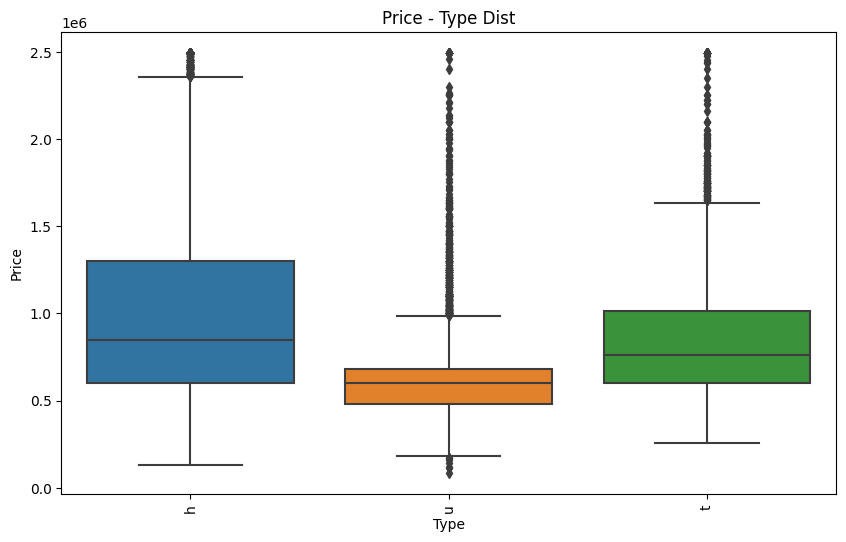

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_copy, x='Type', y='Price')
plt.xticks(rotation=90)
plt.xlabel('Type')
plt.ylabel('Price')
plt.title('Price - Type Dist')
plt.show()


In [ ]:
type_price_mean = df_copy.groupby('Type')['Price'].mean().reset_index()

type_sorted = type_price_mean.sort_values(by='Price')

label_encoder = LabelEncoder()

type_sorted['Type_encoded'] = label_encoder.fit_transform(type_sorted['Type'])

df_copy = df_copy.merge(type_sorted[['Type', 'Type_encoded']], on='Type', how='left')





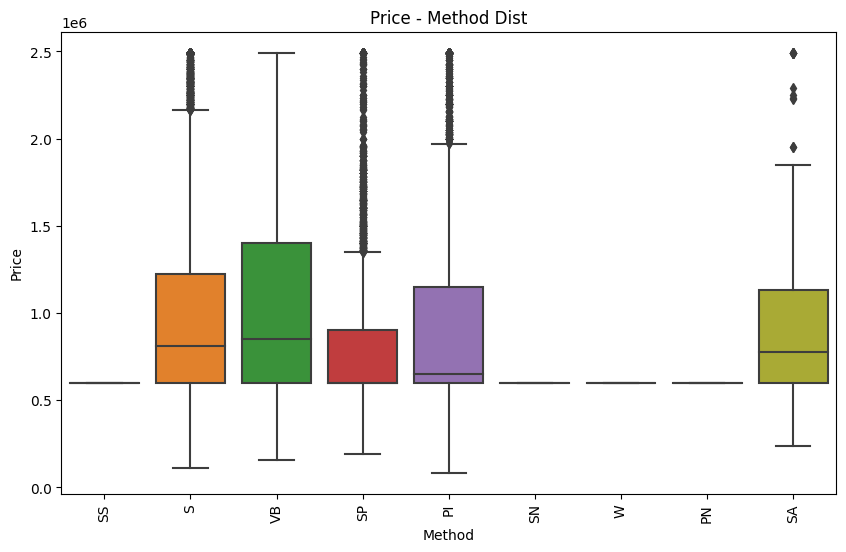

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_copy, x='Method', y='Price')
plt.xticks(rotation=90)
plt.xlabel('Method')
plt.ylabel('Price')
plt.title('Price - Method Dist')
plt.show()


In [ ]:
method_price_mean = df_copy.groupby('Method')['Price'].mean().reset_index()

method_sorted = method_price_mean.sort_values(by='Price')

label_encoder = LabelEncoder()

method_sorted['Method_encoded'] = label_encoder.fit_transform(method_sorted['Method'])

df_copy = df_copy.merge(method_sorted[['Method', 'Method_encoded']], on='Method', how='left')



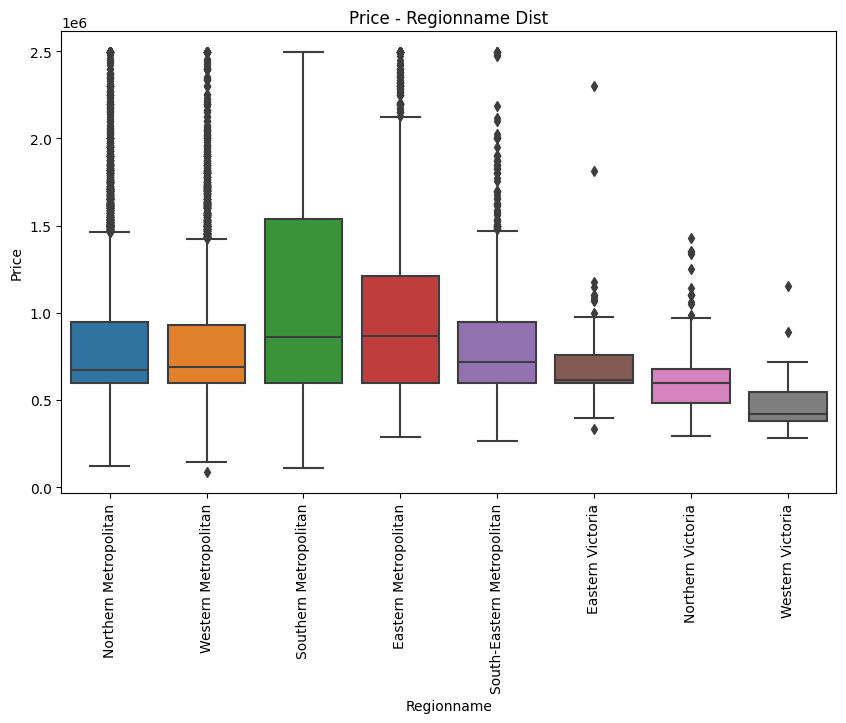

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_copy, x='Regionname', y='Price')
plt.xticks(rotation=90)
plt.xlabel('Regionname')
plt.ylabel('Price')
plt.title('Price - Regionname Dist')
plt.show()


In [ ]:
region_price_mean = df_copy.groupby('Regionname')['Price'].mean().reset_index()
region_sorted = region_price_mean.sort_values(by='Price')

label_encoder = LabelEncoder()

region_sorted['Regionname_encoded'] = label_encoder.fit_transform(region_sorted['Regionname'])

df_copy = df_copy.merge(region_sorted[['Regionname', 'Regionname_encoded']], on='Regionname', how='left')





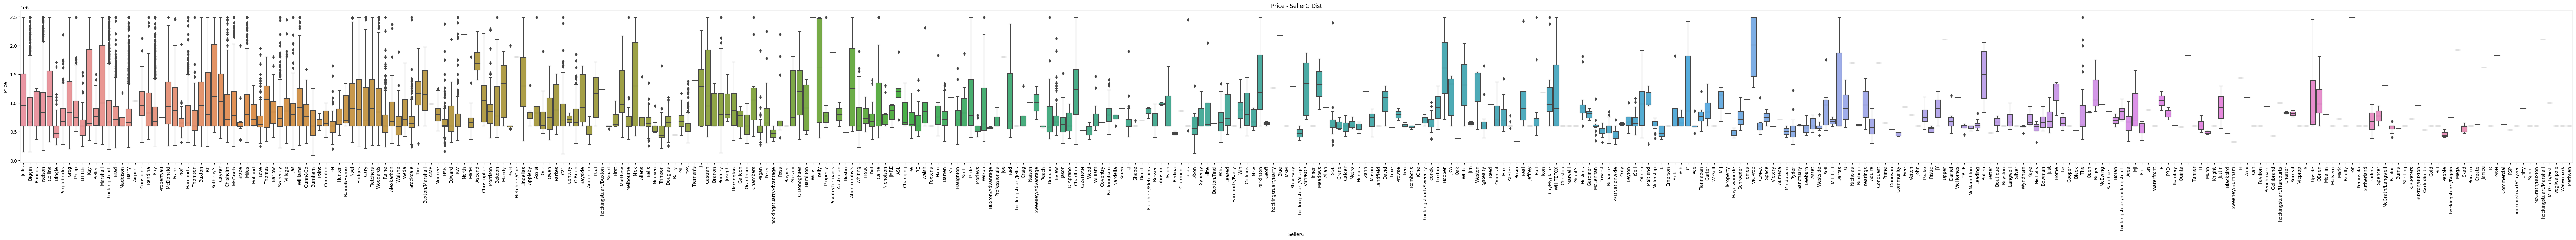

In [ ]:
plt.figure(figsize=(100, 6))
sns.boxplot(data=df_copy, x='SellerG', y='Price')
plt.xticks(rotation=90)
plt.xlabel('SellerG')
plt.ylabel('Price')
plt.title('Price - SellerG Dist')
plt.show()

In [ ]:
seller_price_mean = df_copy.groupby('SellerG')['Price'].mean().reset_index()

seller_sorted = seller_price_mean.sort_values(by='Price')

label_encoder = LabelEncoder()

seller_sorted['SellerG_encoded'] = label_encoder.fit_transform(seller_sorted['SellerG'])

df_copy = df_copy.merge(seller_sorted[['SellerG', 'SellerG_encoded']], on='SellerG', how='left')



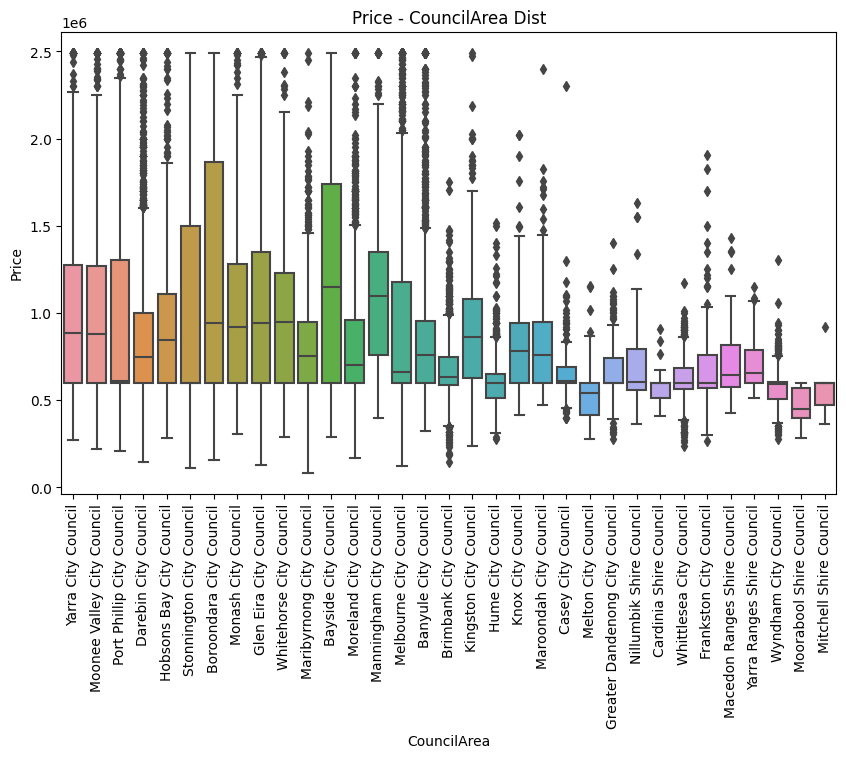

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_copy, x='CouncilArea', y='Price')
plt.xticks(rotation=90)
plt.xlabel('CouncilArea')
plt.ylabel('Price')
plt.title('Price - CouncilArea Dist')
plt.show()


In [ ]:
council_price_mean = df_copy.groupby('CouncilArea')['Price'].mean().reset_index()

council_sorted = council_price_mean.sort_values(by='Price')

label_encoder = LabelEncoder()

council_sorted['CouncilArea_encoded'] = label_encoder.fit_transform(council_sorted['CouncilArea'])

df_copy = df_copy.merge(council_sorted[['CouncilArea', 'CouncilArea_encoded']], on='CouncilArea', how='left')




Now,  We have the label-encoded values for 'Suburb', 'Address', 'Date', 'Type', 'Method', 'Regionname', 'SellerG', 'CouncilArea' columns.

#Data Visualization:
---

○ Building a Histogram to visualize price distribution

○ Drawing a pair plot to see the relationship between all numerical variables and the price variable.

○ Drawing a correlation matrix by using a heatmap on seaborn

○ Implementing Label Encoder and One Hot encoder for categorical variables

In [ ]:
df_copy

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Suburb_encoded,Address_encoded,Date_encoded,Type_encoded,Method_encoded,Regionname_encoded,SellerG_encoded,CouncilArea_encoded
0,Abbotsford,68 Studley St,2.00,h,600000.00,SS,Jellis,3/09/2016,2.50,3067.00,1.00,1.00,126.00,120.00,1970.00,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00,0,29455,58,0,6,2,155,31
1,Abbotsford,85 Turner St,2.00,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,1.00,1.00,202.00,120.00,1970.00,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00,0,32509,60,0,2,2,33,31
2,Abbotsford,25 Bloomburg St,2.00,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,1.00,0.00,156.00,79.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00,0,15386,63,0,2,2,33,31
3,Abbotsford,18/659 Victoria St,3.00,u,600000.00,VB,Rounds,4/02/2016,2.50,3067.00,2.00,1.00,0.00,120.00,1970.00,Yarra City Council,-37.81,145.01,Northern Metropolitan,4019.00,0,9767,63,2,7,2,296,31
4,Abbotsford,5 Charles St,3.00,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,2.00,0.00,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00,0,25125,64,0,5,2,33,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34848,Yarraville,13 Burns St,4.00,h,1480000.00,PI,Jas,24/02/2018,6.30,3013.00,1.00,3.00,593.00,120.00,1970.00,Maribyrnong City Council,-37.81,144.88,Western Metropolitan,6543.00,347,5861,38,0,0,6,152,16
34849,Yarraville,29A Murray St,2.00,h,888000.00,SP,Sweeney,24/02/2018,6.30,3013.00,2.00,1.00,98.00,104.00,2018.00,Maribyrnong City Council,-37.82,144.89,Western Metropolitan,6543.00,347,16979,38,0,5,6,321,16
34850,Yarraville,147A Severn St,2.00,t,705000.00,S,Jas,24/02/2018,6.30,3013.00,1.00,2.00,220.00,120.00,2000.00,Maribyrnong City Council,-37.82,144.88,Western Metropolitan,6543.00,347,7349,38,1,2,6,152,16
34851,Yarraville,12/37 Stephen St,3.00,h,1140000.00,SP,hockingstuart,24/02/2018,6.30,3013.00,1.00,2.00,0.00,120.00,1970.00,Maribyrnong City Council,-37.84,145.00,Western Metropolitan,6543.00,347,5420,38,0,5,6,370,16


In [ ]:
num_cols = ['Rooms','Price','Distance','Postcode','Bathroom', 'Car', 'Landsize','BuildingArea','YearBuilt','Lattitude','Longtitude','Propertycount','Suburb_encoded',	'Address_encoded',	'Date_encoded',	'Type_encoded',	'Method_encoded',	'Regionname_encoded',	'SellerG_encoded',	'CouncilArea_encoded']

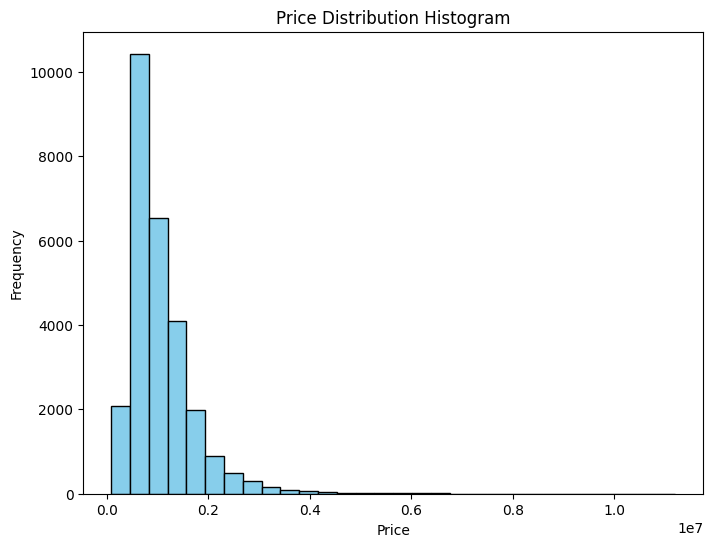

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['Price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Price Distribution Histogram')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()



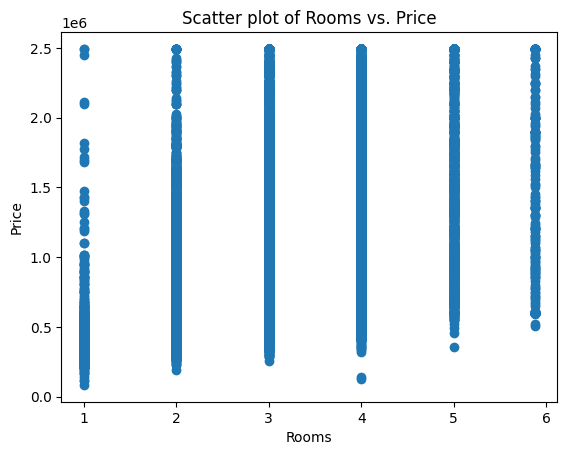

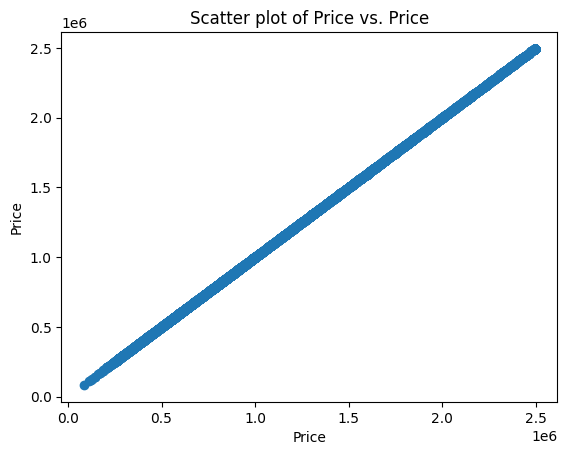

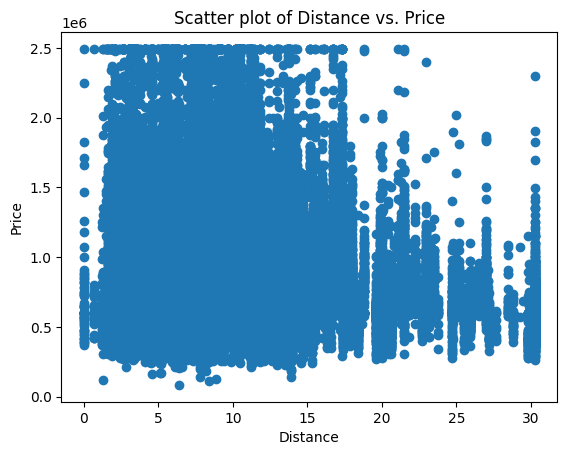

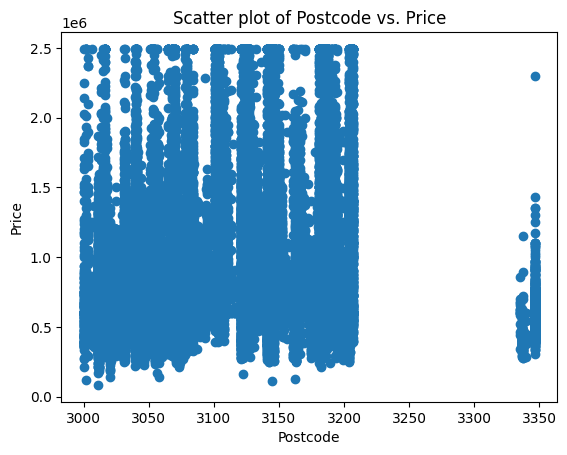

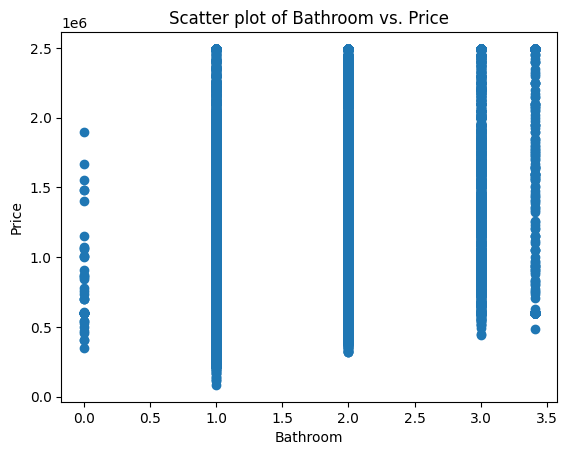

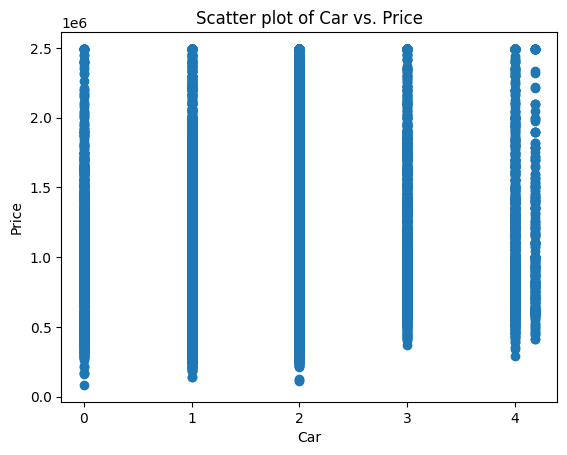

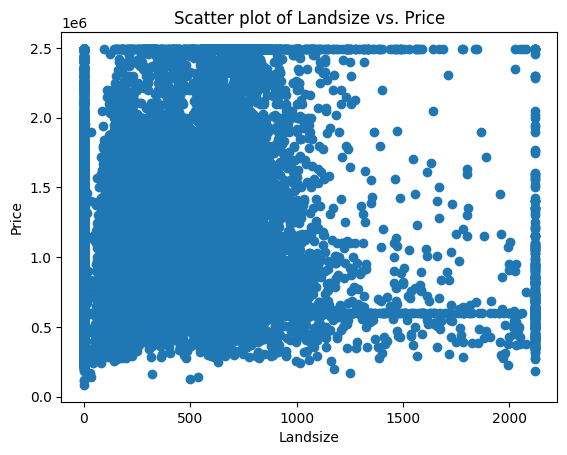

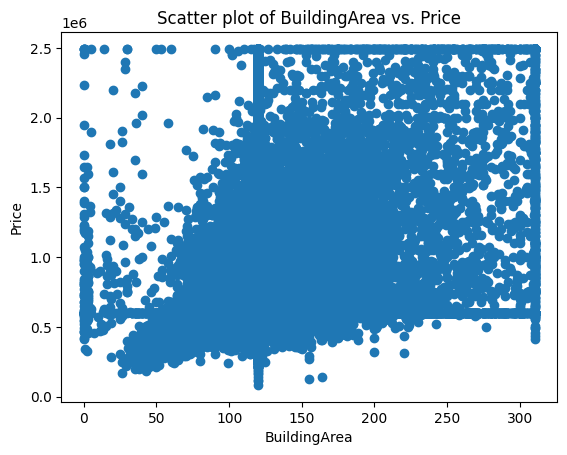

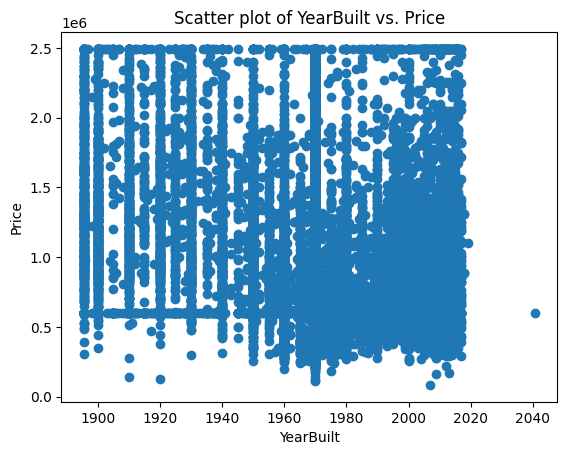

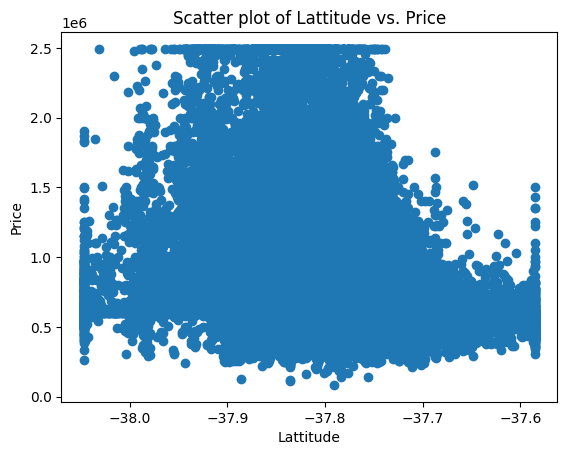

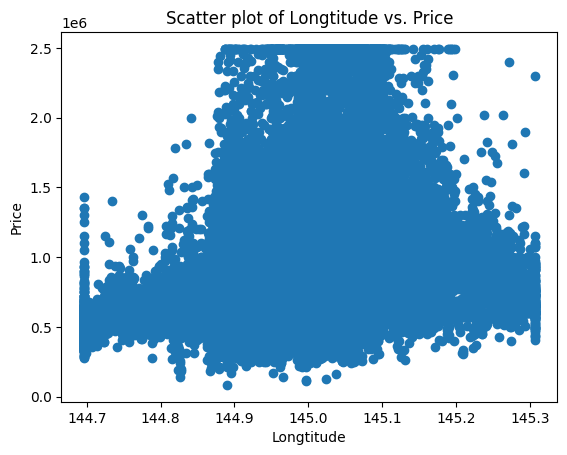

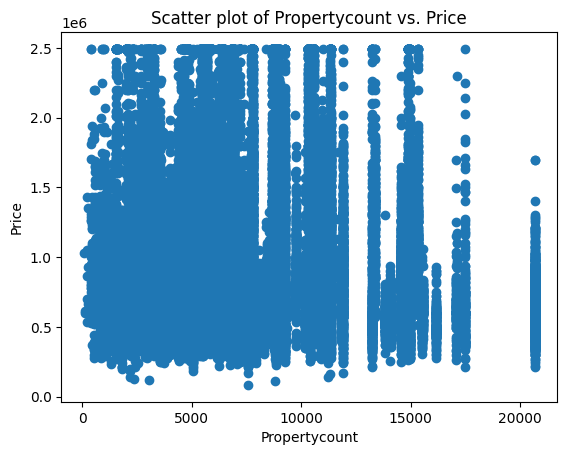

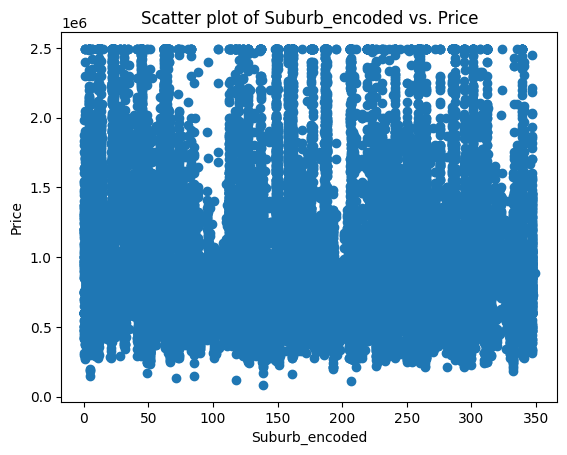

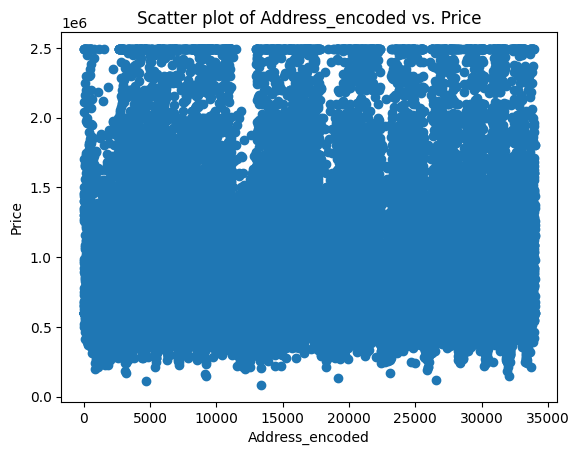

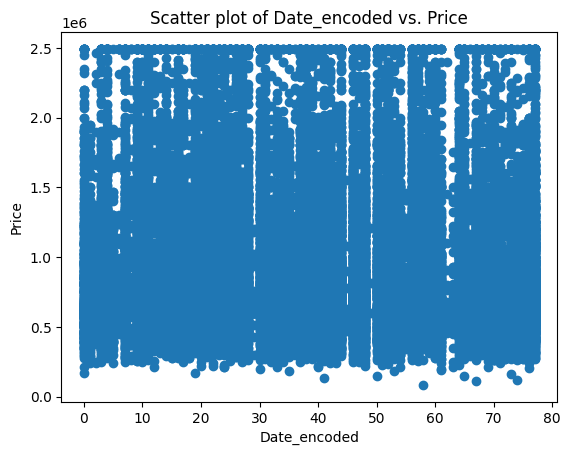

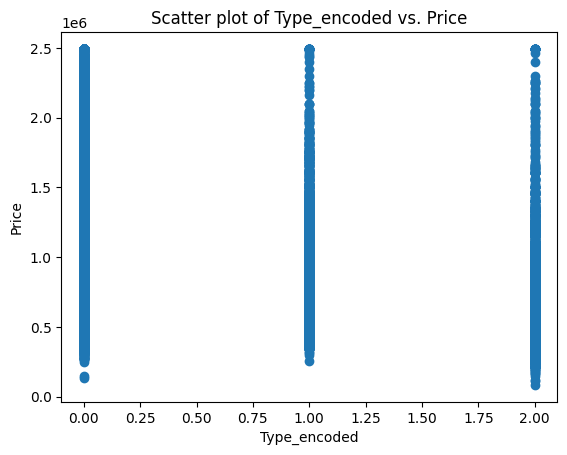

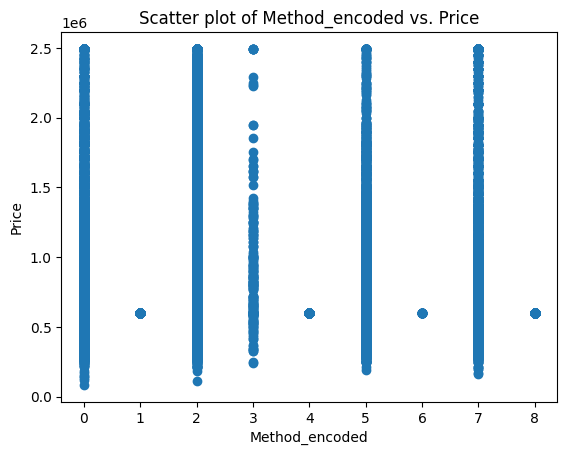

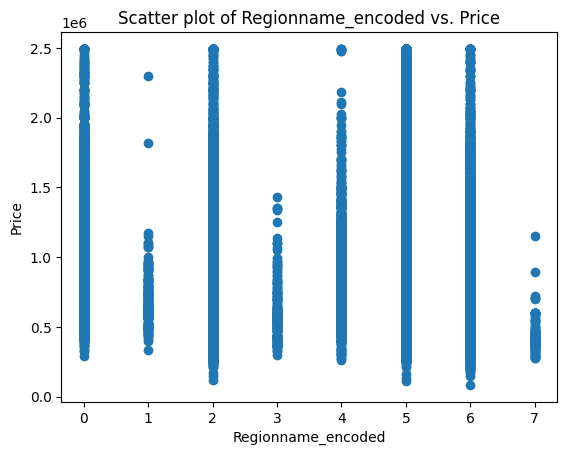

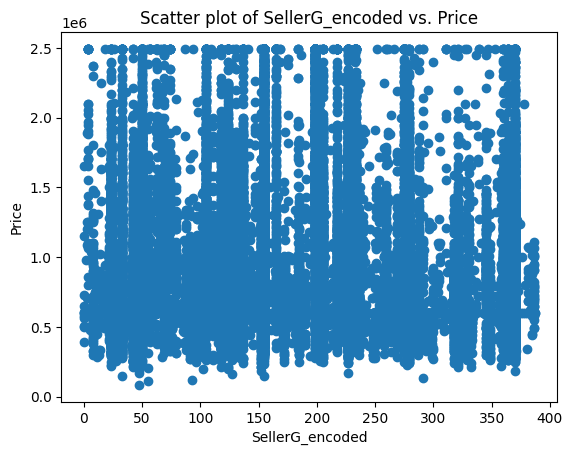

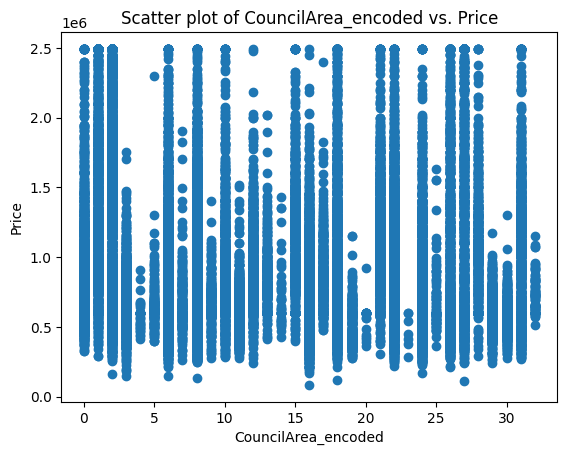

In [ ]:
for column in num_cols:
    plt.scatter(df_copy[column], df_copy['Price'])
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.title(f'Scatter plot of {column} vs. Price')
    plt.show()


# Observing Scatterplots:

We need to focus on the scatterplots that involve the "Price" variable on one axis and other numerical variables on the other axis. These scatterplots help identify relationships between the price and other variables.

Strength of Correlation: We should determine whether there's a clear trend or pattern in the scatterplots. A strong correlation will show a noticeable pattern, while a weak correlation will appear more scattered. For example, in our case 'Landsize' and 'BuildingArea' have a weak correlation and would not really affect our model. On the other hand, 'Bathroom' and 'Car' have a noticeable pattern (strong correlation).

We can identify any outliers in the scatterplots. Outliers are data points that deviate significantly from the general trend. And we can look for clusters of data points that suggest specific patterns or subgroups within the data.


In [ ]:
correlation_matrix = df_copy.corr()

<ipython-input-38-ec1174252c77>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_copy.corr()


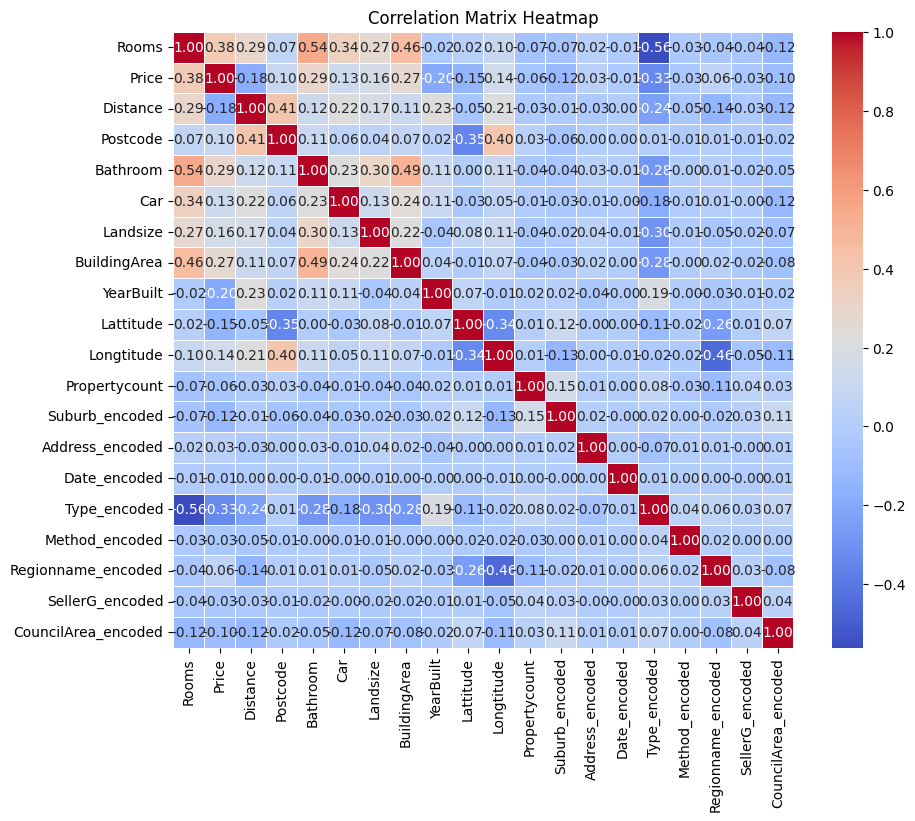

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


#Interpreting the Heatmap:

---

-Color Intensity: The color intensity or shade of each square represents the strength of the correlation. Darker colors indicate a stronger correlation, while lighter colors suggest a weaker correlation.

-Positive Correlation: Look for clusters of positively correlated variables. These are pairs of variables that move in the same direction. For example, if the color is dark and positive between "Price" and "Rooms," it means that as the number of rooms increases, the price tends to increase.

-Negative Correlation: Similarly, look for clusters of negatively correlated variables. These are pairs of variables that move in opposite directions. A dark negative correlation between "Price" and "Distance" would imply that as the distance (to the city center maybe) increases, the price tends to decrease.

-No Correlation: Squares with very light colors (close to white) indicate little to no correlation between variables. Variables that are not correlated do not show any consistent relationship. In our case, they do not affect the 'Price' much.

-Direction of Relationship: Observe the diagonal of the heatmap, where squares are all the same color (usually dark red or 1.0). This represents the correlation of a variable with itself, which is always perfect and shows a variable's distribution.

--Based on the observations above, we can see that 'Date' and 'Propertycount' columns have a correlation very close to zero.

# Model Selection and Evaluation

---



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score




Dropping the categorical columns because I included the encoded version of these, and dropping the Price column because that is our target variable.

In [ ]:
from sklearn.model_selection import train_test_split

X = df_copy.drop(columns=['Price','Suburb', 'Address', 'Type','SellerG','Method','Date','CouncilArea','Regionname',])
y = df_copy['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





#In the next code, I want to sort the columns according to their impact on the Price column so that I can decide which variables to include in the model. It involves:

-Creating and training a Random Forest Regressor model on the training data and extracting feature importances from the model using rf_model.feature_importances_.

-Creating a DataFrame to associate feature names with their importances.
-Sorting the DataFrame by importance in ascending order.

-Plotting the feature importances using a horizontal bar chart, making it easy to visualize the relative importance of each feature.

The resulting plot will show us which columns/features have the most impact on the Price which is our target varibale based on the Random Forest model. Features with higher importance scores are considered more influential in predicting the Price.

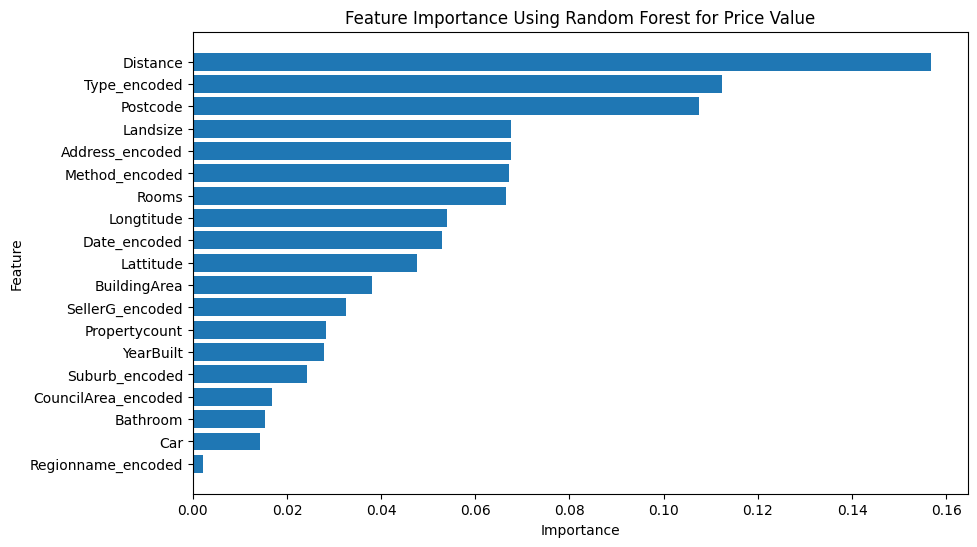

In [ ]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

feature_importances = rf_model.feature_importances_

feature_importance_df_copy = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

feature_importance_df_copy = feature_importance_df_copy.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_copy['Feature'], feature_importance_df_copy['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Using Random Forest for Price Value')
plt.show()



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

models = {
    'Lasso': Lasso(),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'ElasticNet': ElasticNet(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(n_estimators=5, learning_rate=1.2, loss='exponential', random_state=2)
}

model_results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)


    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)


    model_results[model_name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R-squared': r2
    }


for model_name, results in model_results.items():
    print(f"{model_name}:")
    for metric, value in results.items():
        print(f"{metric}: {value:.4f}")
    print("\n")



Lasso:
MAE: 283073.8912
MSE: 155410006904.1248
RMSE: 394220.7591
R-squared: 0.3552


LinearRegression:
MAE: 283073.5839
MSE: 155409803974.6654
RMSE: 394220.5017
R-squared: 0.3552


Ridge:
MAE: 283080.8236
MSE: 155414423340.8749
RMSE: 394226.3605
R-squared: 0.3552


ElasticNet:
MAE: 296474.0672
MSE: 163726981436.2484
RMSE: 404631.9086
R-squared: 0.3207


KNeighborsRegressor:
MAE: 352362.7384
MSE: 232346152300.0522
RMSE: 482022.9790
R-squared: 0.0359


RandomForestRegressor:
MAE: 221204.0944
MSE: 120889753355.2029
RMSE: 347692.0381
R-squared: 0.4984


GradientBoostingRegressor:
MAE: 242423.5908
MSE: 128700255421.2045
RMSE: 358748.1783
R-squared: 0.4660


AdaBoostRegressor:
MAE: 300518.0124
MSE: 164910382006.3824
RMSE: 406091.5931
R-squared: 0.3157




#Evaluation

---
The RandomForestRegressor model's performance seems to be the highest among all of them and I think that it is relatively decent. It shows moderate predictive power with an R² of 0.4984, suggesting that the model explains a significant portion of the variance in house prices. However, of course there is room for improvement, as indicated by the MAE, MSE, and RMSE values, which suggest that the model's predictions still have some errors and variability. I tried to improve this score as much as possible in the timeframe I had for this Project, and I will continue on working on it after I submit this, too. I hope my project is convinient and clear enough for you. 🙂 🏆 🎉

Thank you!

